# Kütüphanelerin İmport Edilmesi


#Eksik değerler için kütüphanenin indirilmesi

In [49]:
!pip install missingno

# Veri Manipülasyonu ve Matematiksel Hesaplamalar için Kütüphanelerin Import Edilmesi.


In [50]:
import pandas as pd
import numpy as np

# Grafik Çizimleri için Kütüphanelerin Import Edilmesi.


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# Eksik Değerler için Kütüphanenin Import Edilmesi.


In [52]:
import missingno as msno

# Bazı Uyarıları Almamak için Kütüpanelerin Import Edilmesi.


In [53]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=Warning) #Olası bazı hataları ignore ediyoruz, görmezden geliyoruz.


#junior-data-analyst-case.csv dosyasını okutma

In [54]:
df = pd.read_csv('/content/junior_data_analyst_case.csv')

#ilk 5 gözleme bakalım.

In [55]:
df.head()

,Date,Store_ID,Product_ID,Product_Category,Units_Sold,Revenue,Cost,Region
0,2024-10-01,108,P048,Electronics,23,1342,3793,South
1,2024-10-01,102,P042,Electronics,41,426,2468,South
2,2024-10-01,103,P038,Books,50,121,509,West
3,2024-10-02,119,P015,Books,6,2888,2626,North
4,2024-10-02,118,P022,Electronics,39,1988,4218,West


#Gözlem ve değişken sayısı

In [56]:
df.shape

(200, 8)

#Her değişkendeki toplam eksik değer sayısı

In [57]:
df.isnull().sum()

,0
Date,0
Store_ID,0
Product_ID,0
Product_Category,0
Units_Sold,0
Revenue,0
Cost,0
Region,0


#Yinelenen satır kontrolü

In [58]:
duplicated_rows = df[df.duplicated()]
print("Yinelenen satırlar:", duplicated_rows) #Yinelenen satırlar bulunmadığı için bu DataFrame boştur.

Yinelenen satırlar: Empty DataFrame
Columns: [Date, Store_ID, Product_ID, Product_Category, Units_Sold, Revenue, Cost, Region]
Index: []


#Her sütun için uygun veri türü olup olmadığını kontrol etme

In [59]:
df.dtypes

,0
Date,object
Store_ID,int64
Product_ID,object
Product_Category,object
Units_Sold,int64
Revenue,int64
Cost,int64
Region,object


In [60]:
try:
      df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Tarih formatına dönüştürme
      df['Store_ID'] = df['Store_ID'].astype(str)              # Mağaza ID'yi metin olarak ele alma
      df['Product_ID'] = df['Product_ID'].astype(str)          # Ürün ID'yi metin olarak ele alma
      df['Product_Category'] = df['Product_Category'].astype('category')  # Kategorik olarak ele alma
      df['Units_Sold'] = pd.to_numeric(df['Units_Sold'], errors='coerce')  # Sayısal olarak ele alma
      df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')        # Sayısal olarak ele alma
      df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')              # Sayısal olarak ele alma
      df['Region'] = df['Region'].astype('category')          # Kategorik olarak ele alma
except Exception as e:
    print(f"Bir hata oluştu: {e}")



In [61]:
df.dtypes

,0
Date,datetime64[ns]
Store_ID,object
Product_ID,object
Product_Category,category
Units_Sold,int64
Revenue,int64
Cost,int64
Region,category


#Her işlem için karı hesaplama

In [62]:
# Profit (Kâr) sütununu ekleme
df['Profit'] = df['Revenue'] - df['Cost']
df.head()

,Date,Store_ID,Product_ID,Product_Category,Units_Sold,Revenue,Cost,Region,Profit
0,2024-10-01,108,P048,Electronics,23,1342,3793,South,-2451
1,2024-10-01,102,P042,Electronics,41,426,2468,South,-2042
2,2024-10-01,103,P038,Books,50,121,509,West,-388
3,2024-10-02,119,P015,Books,6,2888,2626,North,262
4,2024-10-02,118,P022,Electronics,39,1988,4218,West,-2230


#Toplam kâra göre en iyi performans gösteren 5 mağazayı belirleme.

In [63]:
# Mağaza bazında toplam kârı hesaplama
store_profit = df.groupby('Store_ID')['Profit'].sum().sort_values(ascending=False)
# En iyi 5 mağazayı seçme
top_5_stores = store_profit.head(5)
top_5_stores

,Profit
Store_ID,
112,16438
116,10066
114,9554
108,8747
109,7478


#En yüksek gelire sahip ürün kategorisini belirleme

In [64]:
# Ürün kategorisi bazında toplam geliri hesaplama
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
# En yüksek gelire sahip ürün kategorisini belirleme
top_category = category_revenue.idxmax()
top_revenue = category_revenue.max()
print(f"En yüksek gelire sahip ürün kategorisi: {top_category}")
print(f"Toplam gelir: {top_revenue}")

En yüksek gelire sahip ürün kategorisi: Books
Toplam gelir: 121830


#Her bölgede mağaza başına satılan ortalama birimleri analiz etme

In [65]:
# Bölge ve mağaza bazında toplam satılan birim sayısını hesaplama
region_store_units = df.groupby(['Region', 'Store_ID'])['Units_Sold'].sum()
# Bölge bazında mağaza başına ortalama satılan birim sayısını hesaplama
average_units_per_store = region_store_units.groupby('Region').mean()
print("Her bölgedeki mağaza başına ortalama satılan birim sayısı:")
print(average_units_per_store)

Her bölgedeki mağaza başına ortalama satılan birim sayısı:
Region
East     66.714286
North    70.428571
South    52.523810
West     64.523810
Name: Units_Sold, dtype: float64


#Bölgeye göre toplam geliri gösteren bir çubuk grafik oluşturma

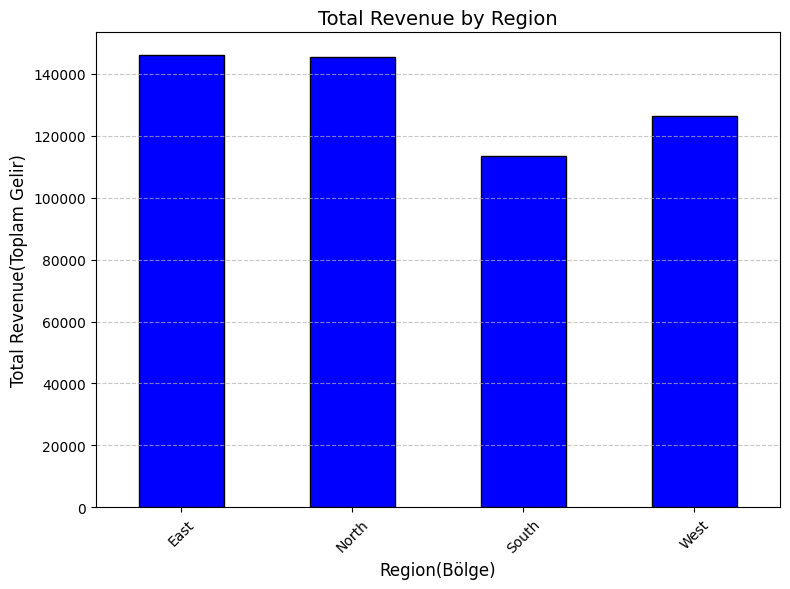

In [66]:
# Bölge bazında toplam geliri hesaplama
total_revenue_by_region = df.groupby('Region')['Revenue'].sum()

# Bar grafiği oluşturma
plt.figure(figsize=(8, 6))
total_revenue_by_region.plot(kind='bar', color='blue', edgecolor='black')

# Grafik başlıkları ve etiketleri
plt.title('Total Revenue by Region', fontsize=14)
plt.xlabel('Region(Bölge)', fontsize=12)
plt.ylabel('Total Revenue(Toplam Gelir)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiği gösterme
plt.tight_layout()
plt.show()

#Son çeyreğe ait günlük toplam gelir eğilimlerini gösteren çizgi grafik

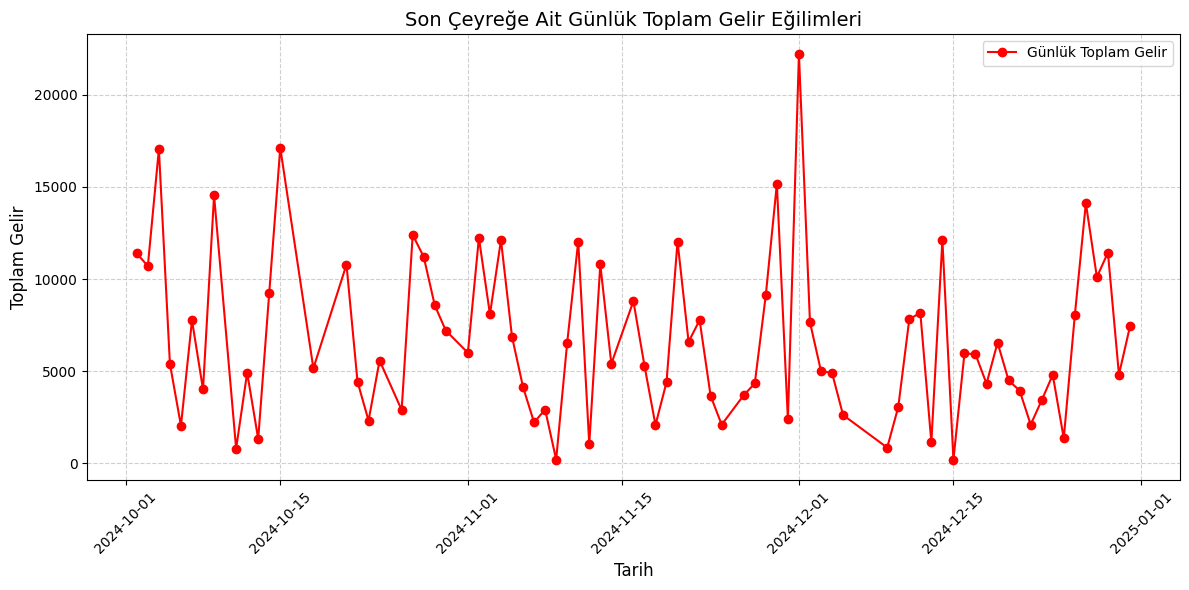

In [67]:
# Son çeyrek (90 gün) için verileri filtreleme
last_quarter_data = df[df['Date'] >= df['Date'].max() - pd.Timedelta(days=90)]

# Tarihe göre günlük toplam geliri hesaplama
daily_revenue = last_quarter_data.groupby('Date')['Revenue'].sum().reset_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], marker='o', color='r', label='Günlük Toplam Gelir')
plt.title('Son Çeyreğe Ait Günlük Toplam Gelir Eğilimleri', fontsize=14)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Toplam Gelir', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

# Grafiği gösterme
plt.show()

#Her ürün kategorisinin toplam gelire katkısını yüzde olarak gösteren bir pasta grafiği oluşturma

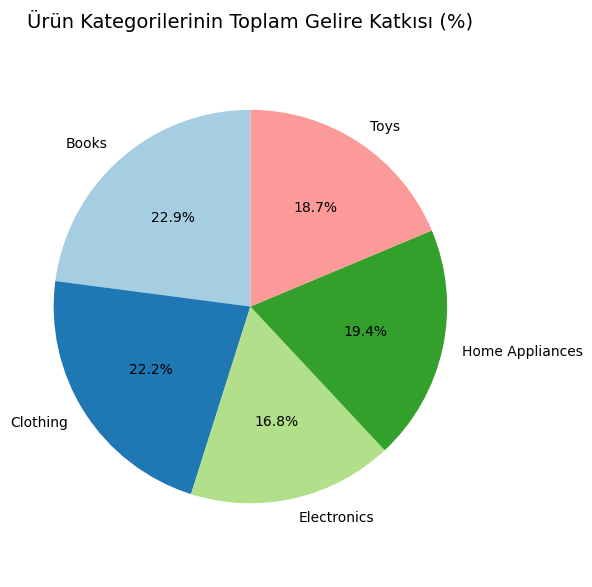

In [68]:
# Her ürün kategorisinin toplam gelirini hesaplama
category_revenue = df.groupby('Product_Category')['Revenue'].sum().reset_index()

# Yüzdelik değerleri hesaplama
category_revenue['Percentage'] = (category_revenue['Revenue'] / category_revenue['Revenue'].sum()) * 100

# Pasta grafiği oluşturma
plt.figure(figsize=(6, 6))
plt.pie(
    category_revenue['Revenue'],
    labels=category_revenue['Product_Category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Ürün Kategorilerinin Toplam Gelire Katkısı (%)', fontsize=14)
plt.axis('equal')  # Pasta grafiğini dairesel yapar.
plt.tight_layout()

# Grafiği gösterme
plt.show()

#Analize dayanarak, düşük performans gösteren bölgelerde satışları arttıracak strateji önerisi

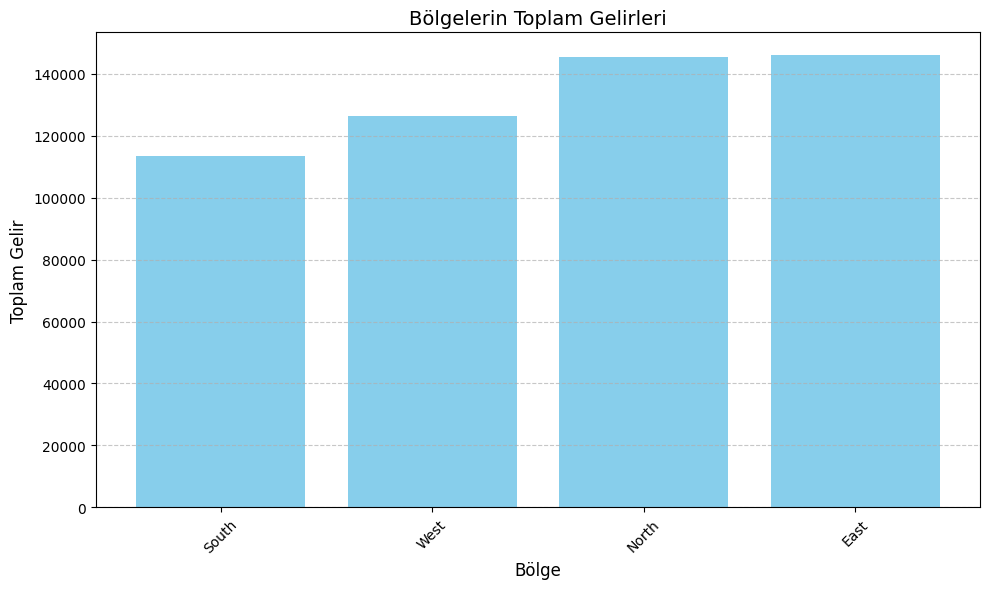

Düşük performans gösteren bölge: South
Strateji önerisi: Bu bölgede satışları artırmak için şu adımlar atılabilir:
- Bölgedeki müşteri tercihleri ve rekabet ortamı analiz edilebilir.
- Promosyonlar veya indirim kampanyaları düzenlenebilir
- Daha iyi ürün çeşitliliği ve stok yönetimi sağlanabilir.
- Pazarlama kampanyaları yerel ihtiyaçlara göre özelleştirilebilir.


In [69]:
# Bölgelerin toplam gelirini hesaplama
region_revenue = df.groupby('Region')['Revenue'].sum().reset_index()

# Gelirleri sıralayarak düşük performans gösteren bölgeleri tespit etme
region_revenue = region_revenue.sort_values(by='Revenue')

# En düşük performans gösteren bölge
lowest_performance_region = region_revenue.iloc[0]['Region']

# Çubuk grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.bar(region_revenue['Region'], region_revenue['Revenue'], color='skyblue')
plt.title('Bölgelerin Toplam Gelirleri', fontsize=14)
plt.xlabel('Bölge', fontsize=12)
plt.ylabel('Toplam Gelir', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()

# Strateji önerisi
print(f"Düşük performans gösteren bölge: {lowest_performance_region}")
print("Strateji önerisi: Bu bölgede satışları artırmak için şu adımlar atılabilir:")
print("- Bölgedeki müşteri tercihleri ve rekabet ortamı analiz edilebilir.")
print("- Promosyonlar veya indirim kampanyaları düzenlenebilir")
print("- Daha iyi ürün çeşitliliği ve stok yönetimi sağlanabilir.")
print("- Pazarlama kampanyaları yerel ihtiyaçlara göre özelleştirilebilir.")

#Kârlılığı artırmak için odaklanılacak potansiyel bir kategori belirleme

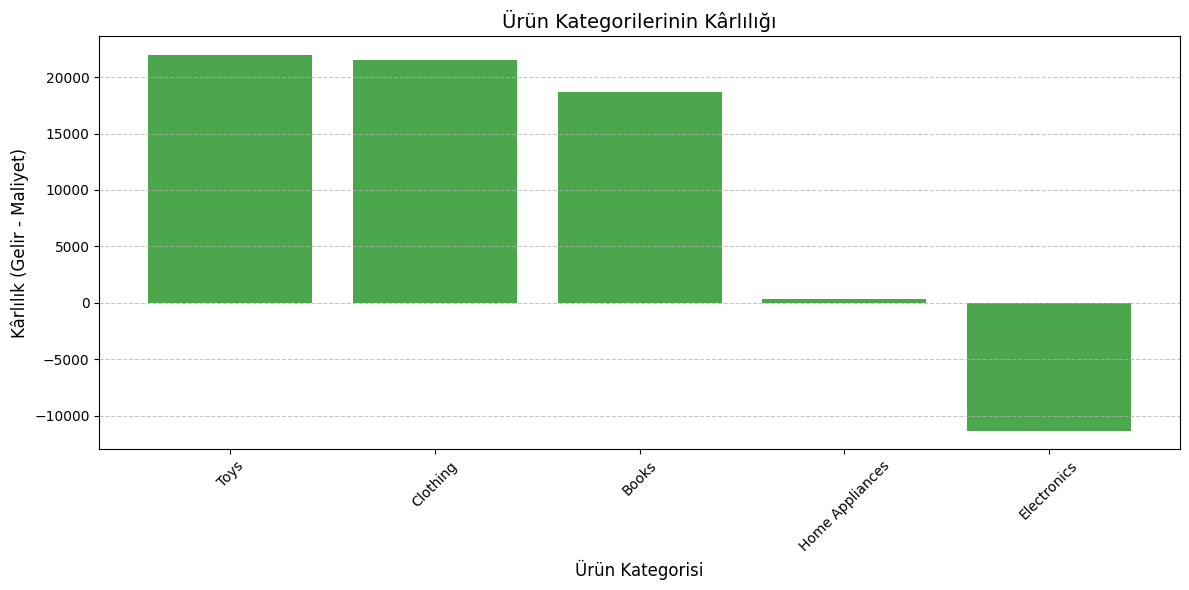

En yüksek kârlılığa sahip kategori: Toys
En düşük kârlılığa sahip kategori: Electronics
Kârlılığı artırmak için odaklanılabilecek kategori:
- Electronics: Zararda. Maliyetleri düşürmek veya satışları artırmak değerlendirilebilir.


In [70]:
# Her kategori için toplam gelir, maliyet ve kârlılığı hesaplama
category_profit = df.groupby('Product_Category').agg({
    'Revenue': 'sum',
    'Cost': 'sum'
}).reset_index()
category_profit['Profit'] = category_profit['Revenue'] - category_profit['Cost']

# Kategorileri kârlılığa göre sırala
category_profit = category_profit.sort_values(by='Profit', ascending=False)

# En yüksek ve düşük kârlılığa sahip kategoriler
highest_profit_category = category_profit.iloc[0]['Product_Category']
lowest_profit_category = category_profit.iloc[-1]['Product_Category']

# Çubuk grafiği oluşturma
plt.figure(figsize=(12, 6))
plt.bar(category_profit['Product_Category'], category_profit['Profit'], color='green', alpha=0.7)
plt.title('Ürün Kategorilerinin Kârlılığı', fontsize=14)
plt.xlabel('Ürün Kategorisi', fontsize=12)
plt.ylabel('Kârlılık (Gelir - Maliyet)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()

# Sonuçları yazdır
print(f"En yüksek kârlılığa sahip kategori: {highest_profit_category}")
print(f"En düşük kârlılığa sahip kategori: {lowest_profit_category}")
print("Kârlılığı artırmak için odaklanılabilecek kategori:")
if category_profit.iloc[-1]['Profit'] < 0:
    print(f"- {lowest_profit_category}: Zararda. Maliyetleri düşürmek veya satışları artırmak değerlendirilebilir.")
else:
    print(f"- {highest_profit_category}: Daha fazla kâr için bu kategoriye yatırımı artırabilirsiniz.")